# Berry-Esseen Confidence Intervals
#### Jimmy Butler
#### 2/1/2024

Notebook containing theoretical work to construct exact $1-\alpha$ confidence intervals (univariate case) or $1-\alpha$ confidence regions (bivariate case) using Berry-Esseen, as well as simulations to demonstrate coverage behavior of such confidence sets.

## Univariate Case: Confidence Interval for $\mu$

Suppose $X_{1}, \dots, X_{n}$ are drawn independently and identically distributed from some distribution $F$. Suppose also:

+ $\mathbb{E}[X_{i} - \mu] = 0$
+ $\mathbb{E}[(X_{i} - \mu)^{2}] = \text{Var}(X_{i}) = \sigma^{2}$
+ $\mathbb{E}[|X_{i} - \mu|^{3}] = \rho < \infty$

Suppose we wish to construct a $1-\alpha$ confidence interval for $\mu$, taking advantage of the CLT and Berry-Esseen, since we are only willing to make the above assumptions regarding the distribution $F$ (and no more).

### CLT Strategy

#### Theory

Under the above assumptions the CLT states that $\frac{\sqrt{n}}{\sigma}(\bar{X}-\mu) \overset{D}{\to} N(0, 1)$. So, assuming $n$ is "large-enough," we can take the quantity on the left to be approximately standard normal. Hence, letting $z_{\alpha/2}$ and $z_{1-(\alpha/2)}$ be the $\alpha/2$ and $1-(\alpha/2)$ quantiles of the standard normal distribution, we can say the following:

$$
\begin{align} 
    &\mathbb{P}\left[ z_{\alpha/2} \leq \frac{\sqrt{n}}{\sigma} (\bar{X}-\mu) \leq z_{1-(\alpha/2)}  \right] \approx 1-\alpha \\
    &\mathbb{P}\left[ \bar{X} + \frac{\sigma}{\sqrt{n}}z_{\alpha/2} \leq \mu \leq \bar{X} + \frac{\sigma}{\sqrt{n}}z_{1-(\alpha/2)} \right] \approx 1 - \alpha
\end{align}
$$

So, an approximate 95% confidence interval for $\mu$ would be given by the following bounds

$$
\begin{equation}
    \boxed{\left[ \bar{X} + \frac{\sigma}{\sqrt{n}}z_{\alpha/2}, \bar{X} + \frac{\sigma}{\sqrt{n}}z_{1-(\alpha/2)} \right]}
\end{equation}
$$

The confidence interval may not have $1-\alpha$ coverage exactly for any finite $n$, but it will get closer and closer as $n \to \infty$.

### Berry-Esseen Strategy

Exact coverage for the above method relies on the sample size being asymptotically large, but this can be impractical. To achieve exact $1-\alpha$ coverage for finite sample size $n$, we can take advantage of the Berry-Esseen theorem (as stated in Durrett).

Denoting $F_{n}(x)$ as the actual distribution function of $\frac{\sqrt{n}}{\sigma}(\bar{X}-\mu)$, and $\Phi(x)$ as the distribution function of a standard normal random variable (i.e. the approximate distribution assumed in the CLT), Berry-Esseen tells us that for every $x$:

$$
\begin{align}
    |F_{n}(x)-\Phi(x)| \leq \frac{C \rho}{\sigma^{2}\sqrt{n}}
\end{align}
$$

So, for every point $x$ we have an upper bound on how bad the CLT normality assumption is, where badness is measured in absolute deviation of the normal CDF with the actual CDF of the variable we are approximating as normal! We can take advantage of this to achieve $1-\alpha$ confidence intervals with exact coverage.

Fix $n$, and let $q_{n,\alpha}$ denote the (unknown) $\alpha$-quantile of the distribution of $\frac{\sqrt{n}}{\sigma}(\bar{X}-\mu)$. Then, we have that (noting the EXACT equality):

$$
\begin{align}
    \mathbb{P} \left[ q_{n, \alpha/2} \leq \frac{\sqrt{n}}{\sigma}(\bar{X}-\mu) \leq q_{n, 1-(\alpha/2)} \right] = 1-\alpha \\   
\end{align}
$$

Note that at the point $q_{n, \alpha}$, Berry-Essen tells us:

$$
\begin{align}
|F_{n}(q_{n,\alpha}) - \Phi(q_{n,\alpha})| &\leq \frac{C\rho}{\sigma^{3}\sqrt{n}} \\
F_{n}(q_{n,\alpha}) &\leq \Phi(q_{n,\alpha}) + \frac{C\rho}{\sigma^{3}\sqrt{n}} \\
F_{n}(q_{n, \alpha}) - \frac{C\rho}{\sigma^{3}\sqrt{n}} &\leq \Phi(q_{n,\alpha}) \\
\Phi^{-1}\left( \alpha - \frac{C\rho}{\sigma^{3}\sqrt{n}} \right) &\leq q_{n,\alpha}
\end{align}
$$

where in the last line, we used the fact that if $q_{n, \alpha}$ is the $\alpha$-quantile of a random variable with distribution function $F_{n}$, then $F_{n}(q_{n, \alpha}) = q$, and that the inverse standard normal distribution function is monotonic.

Using the other side of the Berry-Esseen inequality, we can also derive that $q_{n,\alpha} \leq \Phi^{-1}\left( \frac{3\rho}{\sigma^{3}\sqrt{n}} + \alpha \right)$. Plugging in $\alpha/2$ in for $\alpha$ in the first inequality, and $1-(\alpha/2)$ into the second, we have that:

$$
\begin{align}
\mathbb{P}  \left[ \Phi^{-1}\left( \frac{\alpha}{2} - \frac{C\rho}{\sigma^{3}\sqrt{n}} \right) \leq \frac{\sqrt{n}}{\sigma}(\bar{X}-\mu) \leq \Phi^{-1}\left( \frac{C\rho}{\sigma^{3}\sqrt{n}} + 1 - \frac{\alpha}{2} \right)  \right] \\
\geq \mathbb{P} \left[ q_{n, \alpha/2} \leq \frac{\sqrt{n}}{\sigma}(\bar{X}-\mu) \leq q_{n, 1-(\alpha/2)} \right] = 1-\alpha
\end{align}
$$

So, rewriting as in the CLT case to get $\mu$ in the center of the inequality, we get the following as our Berry-Esseen confidence interval:

$$
\boxed{\begin{equation}
    \left[ \bar{X} - \frac{\sigma}{\sqrt{n}} \Phi^{-1}\left( 1- \frac{\alpha}{2} + \frac{C\rho}{\sigma^{3}\sqrt{n}} \right), \bar{X} - \frac{\sigma}{\sqrt{n}} \Phi^{-1}\left(\frac{\alpha}{2} - \frac{C\rho}{\sigma^{3}\sqrt{n}} \right) \right]
\end{equation}}
$$

Note that the probability of coverage is guaranteed to be greater than or equal to $1-\alpha$, whereas in the CLT case the coverage was only approximately $1-\alpha$ (and could very well be lower in some cases!) This is fine too since when constructing $1-\alpha$ confidence sets, we at least hope it's conservative.

Technically, it is possible that the arguments to $\Phi^{-1}(\cdot)$ to be outside $[0,1]$ depending on the problem, which might throw errors when using software. So, for completeness, we can add positive parts $(\cdot)_{+}$:

$$
\boxed{\begin{equation}
    \left[ \bar{X} - \frac{\sigma}{\sqrt{n}} \Phi^{-1}\left( 1 - \left(\frac{\alpha}{2} - \frac{C\rho}{\sigma^{3}\sqrt{n}}\right)_{+} \right), \bar{X} - \frac{\sigma}{\sqrt{n}} \Phi^{-1}\left(\left(\frac{\alpha}{2} - \frac{C\rho}{\sigma^{3}\sqrt{n}} \right)_{+}\right) \right]
\end{equation}}
$$


*A note about the universal constant C: While several constants have been derived, Durrett mentions C=3 as one arising from a particularly nice proof, but they also report a tightening of C=0.8 due to van Beek (1972)*.

### Simulations

Explore coverage rates and confidence interval behavior for both methods, across sample sizes for different data generation scenarios.

In [16]:
library(ggplot2)

# Function to compute CI using just the CLT (assuming normality holds already)
computeStandardCI <- function(dat, alpha, sigma) {
  
  n <- length(dat)
  lb <- mean(dat) + (sigma/sqrt(n))*qnorm(alpha/2)
  ub <- mean(dat) + (sigma/sqrt(n))*qnorm(1-(alpha/2))
  
  return(c(lb, ub))
}

# Function to compute a CI using Berry-Esseen
computeBerryEsseenCI <- function(dat, alpha, sigma, rho, C) {
  
  n <- length(dat)
  
  lb_prob <- min(1 - alpha/2 + (C*rho/((sigma**3)*sqrt(n))), 1)
  ub_prob <- max(alpha/2 - (C*rho/((sigma**3)*sqrt(n))), 0)
  
  lb <- mean(dat) - (sigma/sqrt(n))*qnorm(lb_prob)
  ub <- mean(dat) - (sigma/sqrt(n))*qnorm(ub_prob)

  return(c(lb, ub))
}

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


#### Bernoulli Data

In [8]:
samp_sizes <- c(10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000)

n_replicates <- 5000
p <- 0.5
alpha <- 0.05
sigma <- sqrt(p*(1-p))
rho <- (p**3)*(1-p) + ((1-p)**3)*p
C <- 0.8

coversBE <- rep(NA, n_replicates)
coversStandard <- rep(NA, n_replicates)

propCovsStandard <- rep(NA, length(samp_sizes))
propCovsBE <- rep(NA, length(samp_sizes))

for (i in 1:length(samp_sizes)) {
  
  n <- samp_sizes[i]
  
  for (j in 1:n_replicates) {
    
    dat <- rbinom(n = n, size = 1, prob = p)
    confintBE <- computeBerryEsseenCI(dat, alpha, sigma, rho, C)
    confintStandard <- computeStandardCI(dat, alpha, sigma)
    coversBE[j] <- confintBE[1] <= p & confintBE[2] >= p
    coversStandard[j] <- confintStandard[1] <= p & confintStandard[2] >= p
    
  }
  
  propCovsStandard[i] <- mean(coversStandard)
  propCovsBE[i] <- mean(coversBE)
  
}

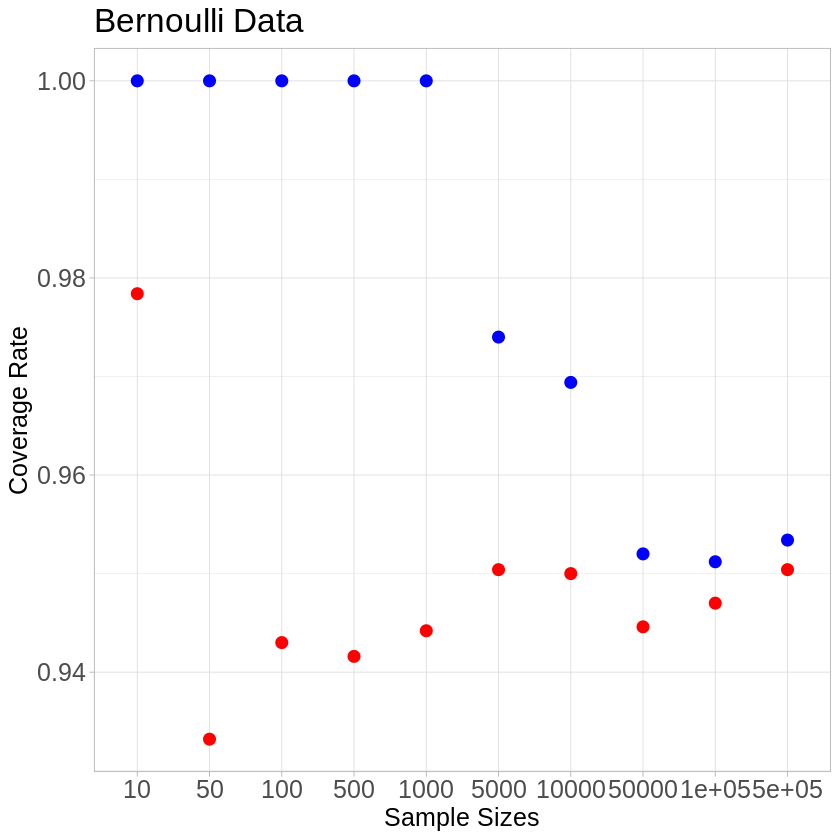

In [41]:
plt_df <- data.frame(samp_sizes = as.factor(samp_sizes), covsCLT = propCovsStandard, covsBE = propCovsBE)
ggplot(plt_df) + geom_point(aes(x = samp_sizes, y = covsCLT), color = 'red', size=3) +
                 geom_point(aes(x=samp_sizes, y=covsBE), color='blue', size=3) + 
                 xlab('Sample Sizes') + ylab('Coverage Rate') + ggtitle('Bernoulli Data') +
                 theme_light() +
                 theme(axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=20))





#### Chi-Square Data

In [48]:
samp_sizes <- c(10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000)

n_replicates <- 5000
k <- 1
alpha <- 0.05
sigma <- sqrt(2*k)
rho <- k*(k+2)*(k+4)
C <- 0.8

coversBE <- rep(NA, n_replicates)
coversStandard <- rep(NA, n_replicates)

propCovsStandard <- rep(NA, length(samp_sizes))
propCovsBE <- rep(NA, length(samp_sizes))

for (i in 1:length(samp_sizes)) {
  
  n <- samp_sizes[i]
  
  for (j in 1:n_replicates) {
    
    dat <- rchisq(n = n, df = k)
    confintBE <- computeBerryEsseenCI(dat, alpha, sigma, rho, C)
    confintStandard <- computeStandardCI(dat, alpha, sigma)
    coversBE[j] <- confintBE[1] <= k & confintBE[2] >= k
    coversStandard[j] <- confintStandard[1] <= k & confintStandard[2] >= k
    
  }
  
  propCovsStandard[i] <- mean(coversStandard)
  propCovsBE[i] <- mean(coversBE)
  
}

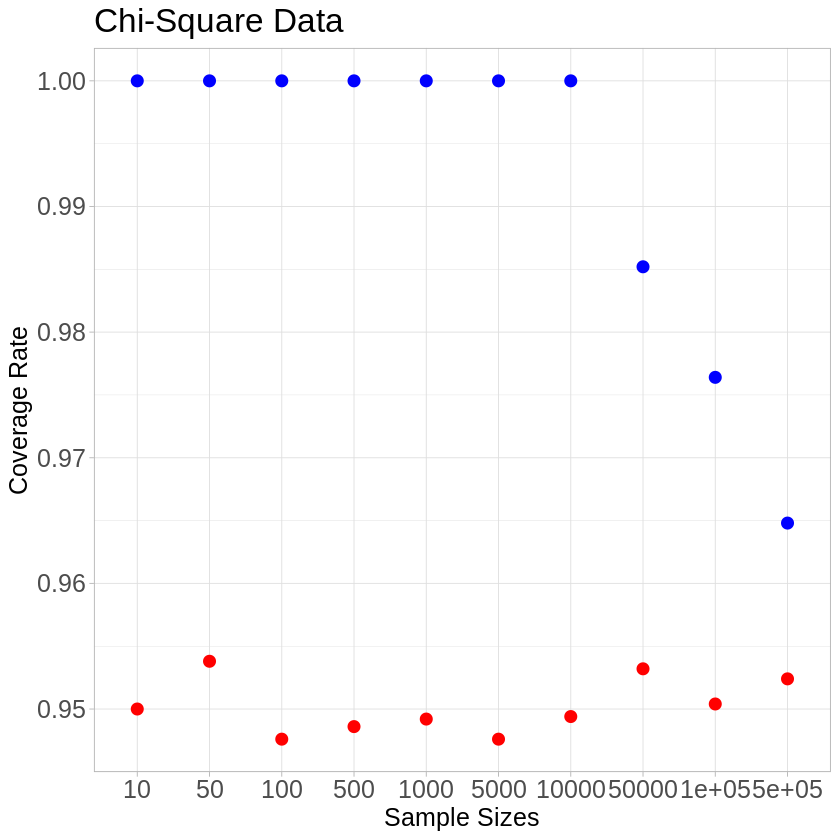

In [49]:
plt_df <- data.frame(samp_sizes = as.factor(samp_sizes), covsCLT = propCovsStandard, covsBE = propCovsBE)
ggplot(plt_df) + geom_point(aes(x = samp_sizes, y = covsCLT), color = 'red', size=3) +
                 geom_point(aes(x=samp_sizes, y=covsBE), color='blue', size=3) + 
                 xlab('Sample Sizes') + ylab('Coverage Rate') + ggtitle('Chi-Square Data') +
                 theme_light() +
                 theme(axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=20))

## Multivariate Case: Confidence Ellipse for $\mu_{d}$

Suppose $X_{1}, \dots, X_{n} \overset{iid}{\sim} F_{d}$, a $d$-dimensional multivariate distribution, where $\text{Cov}(X_{i}) = \Sigma_{d}$ and $\mathbb{E}[X_{i}] = \mu_{d}$.

Note by the multivariate central limit theorem, $\sqrt{n}\Sigma_{d}^{-1/2}(\bar{X}_{n}-\mu_{d}) \overset{D}{\to} N(0_{d}, I_{d})$

Since the $L_{2}$-norm is a continuous function from $\mathbb{R}^{d} \to \mathbb{R}$, and the components of a $N(0, I_{d})$ random vector are i.i.d. standard normal, then by the continuous mapping theorem, we also have that:

$$
\begin{align}
\| \sqrt{n}\Sigma_{d}^{-1/2}(\bar{X}_{n}-\mu_{d}) \|_{2}^{2} = n(\bar{X}_{n}-\mu_{d})'\Sigma^{-1}_{d}(\bar{X}_{n}-\mu_{d}) \overset{d}{\to} \chi^{2}_{d}
\end{align}
$$

So, we can define an approximate $1-\alpha$ confidence ellipse $C$ for $\mu_{d}$ as: 

$$
\begin{align}
C = \{\mu \in \mathbb{R}^{d} : n(\bar{X}_{n}-\mu)\Sigma^{-1}_{d}(\bar{X}_{n}-\mu) \leq \chi^{2}_{d}(1-\alpha)\}
\end{align}
$$

where $\chi^{2}_{d}(1-\alpha)$ is the $1-\alpha$ quantile of a $\chi^{2}_{d}$ distribution.

Let $P(C^{c})$ be the true probability of miscoverage using the non-asymptotic distribution at hand, and let $Q(C^{c})$ be the probability of miscoverage assuming the limit distribution holds exactly. We want to upper bound $P(C^{c})$ in our quest for a non-asymptotic $1-\alpha$ confidence ellipse for $\mu_{d}$. Then:

$$
\begin{align}
P(C^{c}) &= P(C^{c}) + Q(C^{c}) - Q(C^{c}) \\
\dots &\leq |P(C^{c}) - Q(C^{c})| + Q(C^{c}) \\
\dots & = |P(C^{c}) - \alpha| + \alpha
\end{align}
$$

To upper bound the absolute value, use Multivariate Berry-Esseen. For any convex set $U \subseteq \mathbb{R}^{2}$, we have that:

$$
\begin{align}
\bigg| \mathbb{P}\left[ \sqrt{n}\Sigma^{-1/2}_{d}(\bar{X}_{n} - \mu_{d}) \in U \right] - \mathbb{P}\left[ Z \in U \right] \bigg| \leq Cd^{1/4} \gamma_{n}
\end{align}
$$

where $\gamma_{n} = \sum_{i=1}^{n} \| n^{-1/2} \Sigma^{-1/2}_{d} (X_{i}-\mu_{d}) \|_{2}^{3}$.

Choosing $U$ to be a circle centered at the origin of radius $\sqrt{\chi^{2}_{d}(1-\alpha)}$, which is a convex set, and noting that the event that a random point falling within such a circle is equivalent to the event that the random point's squared two-norm is less than or equal to $\chi^{2}_{d}(1-\alpha)$, we have that:

$$
\begin{align}
\bigg| \mathbb{P}\left[ n(\bar{X}_{n}-\mu_{d})'\Sigma_{d}^{-1}(\bar{X}_{n}-\mu_{d}) \leq \chi^{2}_{d}(1-\alpha) \right] - \mathbb{P}\left[ \chi^{2}_{d} \leq \chi^{2}_{d}(1-\alpha) \right] \bigg| &\leq Cd^{1/4} \gamma_{n} \\
\bigg| \mathbb{P}\left[ n(\bar{X}_{n}-\mu_{d})'\Sigma_{d}^{-1}(\bar{X}_{n}-\mu_{d}) > \chi^{2}_{d}(1-\alpha) \right] - \mathbb{P}\left[ \chi^{2}_{d} > \chi^{2}_{d}(1-\alpha) \right] \bigg| &\leq \dots \\
\bigg| P(C^{c}) - \alpha \bigg| &\leq \dots
\end{align}
$$

So, we now have an upper bound on $P(C^{c})$ as the following:

$$
\begin{align}
    P(C^{c}) \leq Cd^{1/4} \gamma_{n} + \alpha
\end{align}
$$

Let $\delta = \alpha + d^{1/4}C\gamma_{n}$. Plugging in to express the upper bound on the probability of the coverage event in terms of $\delta$:

$$
\begin{align}
\mathbb{P} \left[ n(\bar{X}_{n}-\mu_{d})'\Sigma_{d}^{-1}(\bar{X}_{n}-\mu_{d}) > \chi^{2}_{d}(1-\delta + d^{1/4}C\gamma_{n}) \right] \leq \delta \\
\mathbb{P} \left[ n(\bar{X}_{n}-\mu_{d})'\Sigma_{d}^{-1}(\bar{X}_{n}-\mu_{d}) \leq \chi^{2}_{d}(1-\delta + d^{1/4}C\gamma_{n}) \right] \geq 1-\delta
\end{align}
$$

implying that our corrected $1-\alpha$ confidence ellipse is of the following form:

$$
\boxed{\begin{equation}
    \left\{\mu \in \mathbb{R}^{d} : n(\bar{X}_{n}-\mu)'\Sigma_{d}^{-1}(\bar{X}_{n}-\mu) \leq \chi^{2}_{d}(1-\alpha + d^{1/4}C\gamma_{n}) \right\}
\end{equation}}
$$

So, our corrected confidence set is of the same form as we derived using the multivariate CLT, but now with a significance level of $1 - \alpha + d^{1/4} C\gamma_{n}$.